In [14]:
import numpy as np
import matplotlib.pyplot as plt

We will study the heisenberg uncertaintly with respect to a function and the momentum and position representation. The principal idea is to show that as show I earn knowledge in one representation I loss presition in the other representation.
Given a function in position space such as:

$$ \psi (x) = Ae^{iqx-\alpha x^2}$$

Where A is normalization constant and $\alpha$, q are parameters.
Transform the position representation to a momentum representation using that Fourier transform:

$$ \psi_{\alpha}(p) = \frac{1}{\sqrt{2\pi \hbar}} \int_{-\infty}^{\infty} dx e^{-\frac{i}{\hbar}xp}\psi_{\alpha}(x)$$

For out implementation we will assume the value of $\hbar = 1$. It give us the following momentum representation:

$$ \psi(p) = \frac{A}{\sqrt{2\hbar \alpha}} e^{\frac{-(\hbar q-p)^2}{4 \hbar^2 \alpha}} $$

Lets define and plot this two functions. We will center the position representation at q value:

c:\Users\Kevin Joven\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Kevin Joven\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


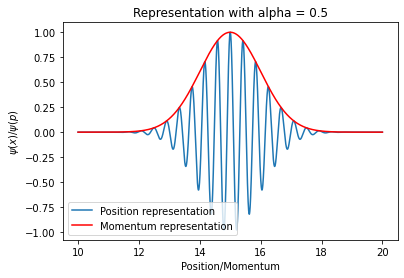

In [15]:
#Variables
q = 15
c = 1
alpha = 0.5

#Ranges
n = 1000000
a = q-5
b = q+5

x = np.linspace(a,b,n)

#Integration function:
def integral(function,n,a,b):
    Area = (b-a)/n
    sum = 0
    for i in range(n):
        sum += function[i]
    res = Area*sum
    return res

#Define the two function:
# In position.
psi = c*np.exp(1j*q*(q-x)-alpha*(q-x)*(q-x))

# In momentum.
psi_p = (c/(np.sqrt(2*alpha)))*np.exp(-((q-x)*(q-x))/(4*alpha))

#plotting.

plt.plot(x,psi, label='Position representation')
plt.plot(x,psi_p,'r', label = 'Momentum representation')

plt.title("Representation with alpha = 0.5")
plt.legend()
plt.ylabel("$\psi(x) / \psi(p)$")
plt.xlabel("Position/Momentum")
plt.show()

As soon as I increased the value of the $\alpha$ value the presition in the position operator is nearly to the dirac function. But, in the same way I loss presition in the momentum representation and it turn on a more flat function.

c:\Users\Kevin Joven\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Kevin Joven\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


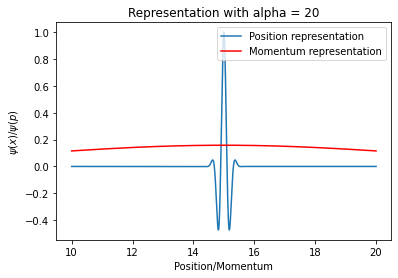

In [16]:
q = 15
c = 1
alpha = 20

psi = c*np.exp(1j*q*(q-x)-alpha*(q-x)*(q-x))
psi_p = (c/(np.sqrt(2*alpha)))*np.exp(-((q-x)*(q-x))/(4*alpha))

plt.plot(x,psi, label='Position representation')
plt.plot(x,psi_p,'r', label = 'Momentum representation')

plt.title("Representation with alpha = 20")
plt.legend()
plt.ylabel("$\psi(x) / \psi(p)$")
plt.xlabel("Position/Momentum")
plt.show()

At this point we need to calculate the normalization constant A it turns of:

$$ \langle \psi | \psi \rangle = 1 $$
$$ \langle \psi_{\alpha} | \psi_{\alpha} \rangle = A^2 \int_{-\infty}^{\infty} e^{-iqx-\alpha x^2} e^{iqx-\alpha x^2} dx $$

With the result of the constant normalization:

$$ A = \Big(\frac{2\alpha}{\pi}\Big)^{1/4} $$

Now we will integer the two representation and see if everything is clear:

In [19]:
#define the final functions.
q = 15
alpha = 0.5

#define normalization
c = ((2*alpha)/(np.pi))**(1/4)

#Position representation and complex.
psi = c*np.exp(1j*q*(q-x)-alpha*(q-x)*(q-x))
psi_cpx = c*np.exp(-1j*q*(q-x)-alpha*(q-x)*(q-x))

#Momentum representation.
psi_p = (c/(np.sqrt(2*alpha)))*np.exp(-((q-x)*(q-x))/(4*alpha))

#Calculating the integral over the psi function.
print("The value in position rep = {}".format(np.real(integral(psi*psi_cpx,n,a,b))))
print("The value in momentum rep = {}".format(np.real(integral(psi_p*psi_p,n,a,b))))

The value in position rep = 0.9999989999986885
The value in momentum rep = 0.9999989999986884


Now we will calculate the heisenberg uncertainty principle using the two representation that we have.
How we have the momentum and position representation we will calcualte the two variances in his own basis that means:

$$ \triangle p = \sqrt{ \langle p^2 \rangle - \langle p \rangle^2 }$$

$$ \triangle x = \sqrt{ \langle x^2 \rangle - \langle x \rangle^2 }$$

The two representation are more easy to calculate duo to we have both representations.

In [20]:
#Expectation value of x and x^2 using the position representation.
exp_x = np.real(integral(psi*x*psi_cpx,n,a,b))
exp_x2 = np.real(integral(psi*x*x*psi_cpx,n,a,b))
var_x = np.real(np.sqrt(exp_x2-exp_x*exp_x))

print("Expectation value of x = {}".format(exp_x))
print("Expectation value of x^2 = {}".format(exp_x2))
print("Variance of x = {}".format(var_x))

print("------------------------------------------")

#Expectation value of p and p^2 using the momentum representation.
exp_p = integral(psi_p*x*psi_p,n,a,b)
exp_p2 = integral(psi_p*x*x*psi_p,n,a,b)
var_p = np.sqrt(exp_p2-exp_p*exp_p)

print("Expectation value of p = {}".format(exp_p))
print("Expectation value of p^2 = {}".format(exp_p2))
print("Variance of p = {}".format(var_p))

print("------------------------------------------")

uncert = var_x*var_p
print("Uncertainty = {}".format(uncert))

Expectation value of x = 14.999984999977304
Expectation value of x^2 = 225.49977449960477
Variance of x = 0.7072655088866229
------------------------------------------
Expectation value of p = 14.999984999977304
Expectation value of p^2 = 225.49977449960477
Variance of p = 0.7072655088866229
------------------------------------------
Uncertainty = 0.5002245000606537


As you can see it agree with the principle due the equation for $\hbar = 1$ is:

$$ \triangle x \triangle p \geq \frac{1}{2} $$